# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import pickle

In [2]:
data=pd.read_csv("Airline_Reviews.csv") #Reading the dataset

In [3]:
data.shape #getting the no.of rows and columns

(23171, 20)

In [4]:
data.head() #reading the dataset

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [5]:
data["Overall_Rating"].value_counts()

1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
n      842
5      830
6      676
Name: Overall_Rating, dtype: int64

In [6]:
data.info() #getting the info of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [7]:
df=data.drop(['Inflight Entertainment','Wifi & Connectivity','Aircraft',
              'Value For Money','Cabin Staff Service','Unnamed: 0','Review Date','Review_Title','Review'],axis=1)
#droping the columns to get efficient model

In [8]:
df.head() #modified dataset

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Food & Beverages,Ground Service,Recommended
0,AB Aviation,9,True,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,4.0,4.0,yes
1,AB Aviation,1,True,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,1.0,1.0,no
2,AB Aviation,1,True,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,no
3,Adria Airways,1,False,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,NaN,1.0,no
4,Adria Airways,1,True,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,no


In [9]:
df["Route"].value_counts()

Melbourne to Sydney                      43
Sydney to Melbourne                      35
Cape Town to Johannesburg                34
Cusco to Lima                            30
Bangkok to Phuket                        28
                                         ..
HKG to BKI                                1
HKG to WUH                                1
HKG to HKT                                1
CRK to HKG                                1
Los Angeles to Seoul via Tokyo Narita     1
Name: Route, Length: 13607, dtype: int64

In [10]:
df.info() #to get info of updated dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline Name       23171 non-null  object 
 1   Overall_Rating     23171 non-null  object 
 2   Verified           23171 non-null  bool   
 3   Type Of Traveller  19433 non-null  object 
 4   Seat Type          22075 non-null  object 
 5   Route              19343 non-null  object 
 6   Date Flown         19417 non-null  object 
 7   Seat Comfort       19016 non-null  float64
 8   Food & Beverages   14500 non-null  float64
 9   Ground Service     18378 non-null  float64
 10  Recommended        23171 non-null  object 
dtypes: bool(1), float64(3), object(7)
memory usage: 1.8+ MB


# CHECKING FOR NULL VALUES AND HANDLING NULL VALUES

In [11]:
df.isnull().any() #checking for null values

Airline Name         False
Overall_Rating       False
Verified             False
Type Of Traveller     True
Seat Type             True
Route                 True
Date Flown            True
Seat Comfort          True
Food & Beverages      True
Ground Service        True
Recommended          False
dtype: bool

In [12]:
df.isnull().sum()  #checking for the sum of null values

Airline Name            0
Overall_Rating          0
Verified                0
Type Of Traveller    3738
Seat Type            1096
Route                3828
Date Flown           3754
Seat Comfort         4155
Food & Beverages     8671
Ground Service       4793
Recommended             0
dtype: int64

In [13]:
#There is null values in some columns so we have to modify the dataset categorical values are replce with mode and numerical are replace with mean
df["Type Of Traveller"].fillna(df["Type Of Traveller"].mode()[0],inplace=True)
df["Seat Type"].fillna(df["Seat Type"].mode()[0],inplace=True)
df["Route"].fillna(df["Route"].mode()[0],inplace=True)
df["Date Flown"].fillna(df["Date Flown"].mode()[0],inplace=True)
df["Seat Comfort"].fillna(df["Seat Comfort"].mean(),inplace=True)
df["Food & Beverages"].fillna(df["Food & Beverages"].mean(),inplace=True)
df["Ground Service"].fillna(df["Ground Service"].mean(),inplace=True)

In [14]:
df.isnull().any() #checking again there is any null values

Airline Name         False
Overall_Rating       False
Verified             False
Type Of Traveller    False
Seat Type            False
Route                False
Date Flown           False
Seat Comfort         False
Food & Beverages     False
Ground Service       False
Recommended          False
dtype: bool

# CONVERTING THE CATEGORICAL COLUMN TO NUMERIC USING LABEL ENCODING

In [15]:
le=LabelEncoder() #creating an object for label encoding

In [16]:
df.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Food & Beverages,Ground Service,Recommended
0,AB Aviation,9,True,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,4.000000,4.0,yes
1,AB Aviation,1,True,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,1.000000,1.0,no
2,AB Aviation,1,True,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.000000,1.0,no
3,Adria Airways,1,False,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,2.553586,1.0,no
4,Adria Airways,1,True,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.000000,1.0,no


In [17]:
df[['Month flown','Year flown']]=df['Date Flown'].str.split(expand=True) #splitting the string

In [18]:
df=df.drop(["Date Flown"],axis=1) #dropping the data flown column

In [19]:
order=['Airline Name','Overall_Rating','Verified','Type Of Traveller','Seat Type','Route','Month flown','Year flown',
       'Seat Comfort','Food & Beverages','Ground Service','Recommended']
df=df.reindex(columns=order) #adjusting to a original order

In [20]:
#we are converting the columns by using label Encoder
df['Airline Name']=le.fit_transform(df['Airline Name'])
df['Overall_Rating']=le.fit_transform(df['Overall_Rating'])
df['Verified']=le.fit_transform(df['Verified'])
df['Type Of Traveller']=le.fit_transform(df['Type Of Traveller'])
df['Seat Type']=le.fit_transform(df['Seat Type'])
df['Route']=le.fit_transform(df['Route'])
df['Month flown']=le.fit_transform(df['Month flown'])
df['Recommended']=le.fit_transform(df['Recommended'])

In [21]:
pickle.dump(le,open("le.pkl","wb"))

In [22]:
df.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Month flown,Year flown,Seat Comfort,Food & Beverages,Ground Service,Recommended
0,0,8,1,3,1,8585,9,2019,4.0,4.000000,4.0,1
1,0,0,1,3,1,8584,6,2019,2.0,1.000000,1.0,0
2,0,0,1,3,1,482,6,2019,2.0,1.000000,1.0,0
3,4,0,0,3,1,4256,11,2019,1.0,2.553586,1.0,0
4,4,0,1,1,1,11778,11,2019,1.0,1.000000,1.0,0


# VISUALIZATION OF DATA

In [23]:
df.describe() #it gives the statical calculation of data

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Month flown,Seat Comfort,Food & Beverages,Ground Service,Recommended
count,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000,23171.000000
mean,245.027880,2.393423,0.531785,2.008675,0.973242,7016.380130,5.495188,2.618321,2.553586,2.353738,0.336930
std,144.313766,3.104117,0.498999,1.077595,0.457584,3612.341934,3.019861,1.327017,1.207396,1.421145,0.472671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,124.000000,0.000000,0.000000,1.000000,1.000000,4101.500000,3.000000,1.000000,2.000000,1.000000,0.000000
50%,237.000000,0.000000,1.000000,2.000000,1.000000,8093.000000,6.000000,2.618321,2.553586,2.353738,0.000000
75%,373.000000,5.000000,1.000000,3.000000,1.000000,9482.000000,7.000000,4.000000,3.000000,3.000000,1.000000
max,496.000000,9.000000,1.000000,3.000000,3.000000,13606.000000,11.000000,5.000000,5.000000,5.000000,1.000000


In [24]:
df.corr(numeric_only=True) #corretion between the columns

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Month flown,Seat Comfort,Food & Beverages,Ground Service,Recommended
Airline Name,1.000000,-0.022610,0.006762,-0.018686,0.032295,-0.030981,-0.006680,-0.035857,-0.026203,-0.023924,-0.015614
Overall_Rating,-0.022610,1.000000,-0.204288,0.163941,-0.076057,0.041676,0.027643,0.382214,0.295038,0.450949,0.534467
Verified,0.006762,-0.204288,1.000000,-0.159073,-0.008561,-0.076355,-0.053120,-0.009543,0.009813,-0.009349,-0.073313
Type Of Traveller,-0.018686,0.163941,-0.159073,1.000000,0.036095,0.049901,0.009462,0.048675,0.033289,0.041037,0.087046
Seat Type,0.032295,-0.076057,-0.008561,0.036095,1.000000,-0.008572,-0.007745,-0.078122,-0.080341,-0.061260,-0.076048
Route,-0.030981,0.041676,-0.076355,0.049901,-0.008572,1.000000,0.012067,-0.000635,0.006327,-0.003002,0.010862
Month flown,-0.006680,0.027643,-0.053120,0.009462,-0.007745,0.012067,1.000000,0.021298,0.015861,0.011897,0.025007
Seat Comfort,-0.035857,0.382214,-0.009543,0.048675,-0.078122,-0.000635,0.021298,1.000000,0.635971,0.672536,0.651380
Food & Beverages,-0.026203,0.295038,0.009813,0.033289,-0.080341,0.006327,0.015861,0.635971,1.000000,0.558308,0.581473
Ground Service,-0.023924,0.450949,-0.009349,0.041037,-0.061260,-0.003002,0.011897,0.672536,0.558308,1.000000,0.709446


<Axes: >

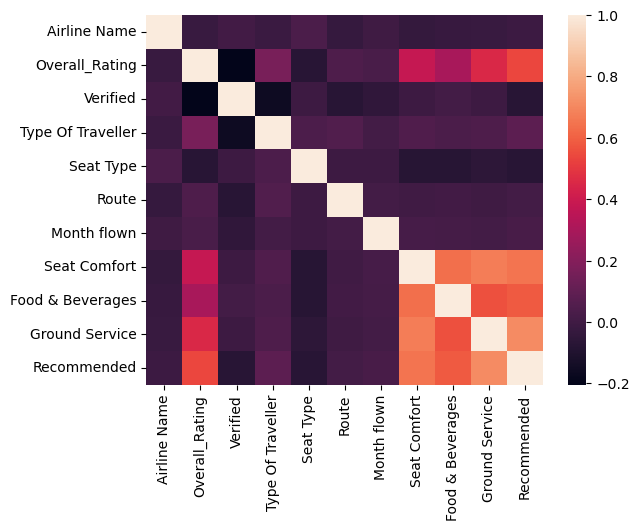

In [25]:
sns.heatmap(df.corr(numeric_only=True)) #it will gives relation between the columns

<Axes: >

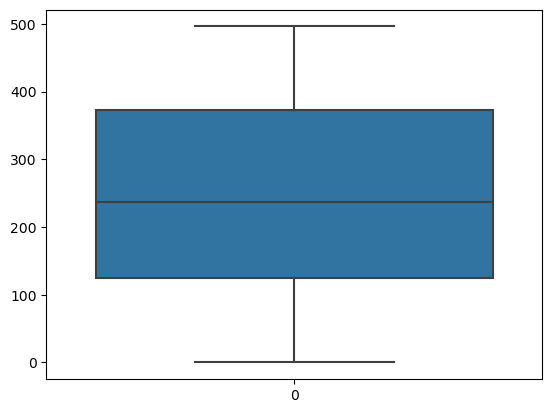

In [26]:
sns.boxplot(df["Airline Name"])

In [27]:
df.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Month flown,Year flown,Seat Comfort,Food & Beverages,Ground Service,Recommended
0,0,8,1,3,1,8585,9,2019,4.0,4.000000,4.0,1
1,0,0,1,3,1,8584,6,2019,2.0,1.000000,1.0,0
2,0,0,1,3,1,482,6,2019,2.0,1.000000,1.0,0
3,4,0,0,3,1,4256,11,2019,1.0,2.553586,1.0,0
4,4,0,1,1,1,11778,11,2019,1.0,1.000000,1.0,0


<Axes: >

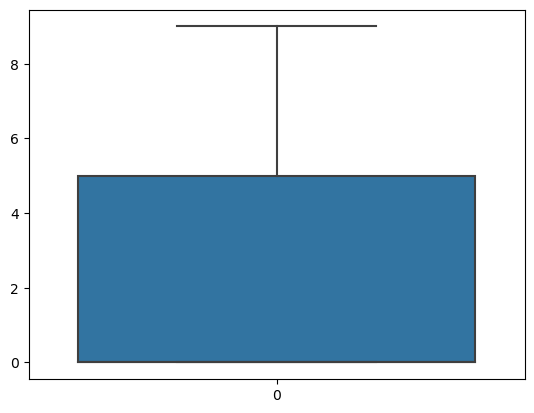

In [28]:
sns.boxplot(df["Overall_Rating"]) #to find outlayers we are plotting the boxplot

<Axes: >

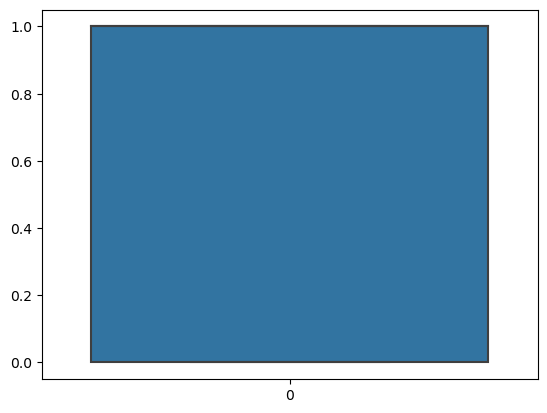

In [29]:
sns.boxplot(df['Verified'])

<Axes: >

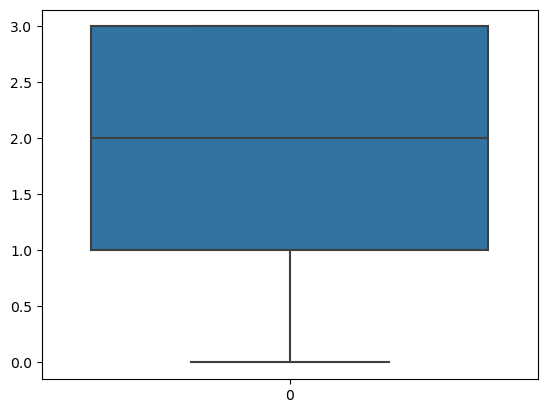

In [30]:
sns.boxplot(df['Type Of Traveller'])

<Axes: >

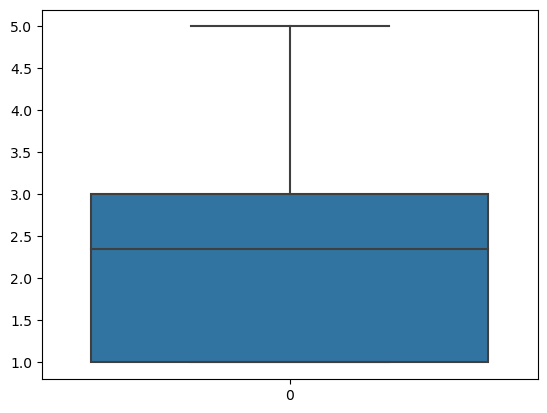

In [31]:
sns.boxplot(df['Ground Service'])

<Axes: >

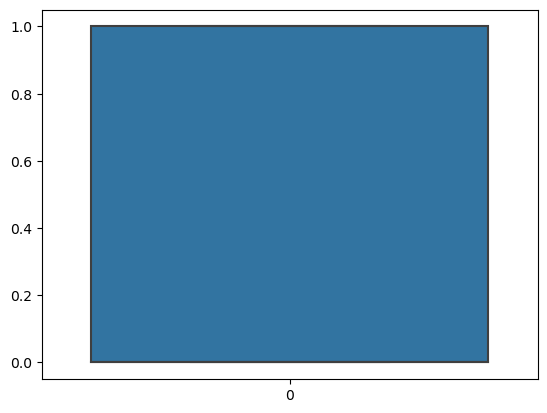

In [32]:
sns.boxplot(df['Recommended'])

# SPLITTING THE INDEPENDENT AND DEPENDENT VARIABLE

In [33]:
x=df.iloc[:,:11] #independent variable
y=df["Recommended"]  #dependent variable

In [34]:
x.head()

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Month flown,Year flown,Seat Comfort,Food & Beverages,Ground Service
0,0,8,1,3,1,8585,9,2019,4.0,4.000000,4.0
1,0,0,1,3,1,8584,6,2019,2.0,1.000000,1.0
2,0,0,1,3,1,482,6,2019,2.0,1.000000,1.0
3,4,0,0,3,1,4256,11,2019,1.0,2.553586,1.0
4,4,0,1,1,1,11778,11,2019,1.0,1.000000,1.0


In [35]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Recommended, dtype: int32

In [36]:
x.shape

(23171, 11)

In [37]:
y.shape

(23171,)

In [38]:
y.value_counts()

0    15364
1     7807
Name: Recommended, dtype: int64

In [39]:
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)  #feature scaling
x_scaled

,Airline Name,Overall_Rating,Verified,Type Of Traveller,Seat Type,Route,Month flown,Year flown,Seat Comfort,Food & Beverages,Ground Service
0,0.000000,0.888889,1.0,1.000000,0.333333,0.630972,0.818182,0.636364,0.800000,0.800000,0.750000
1,0.000000,0.000000,1.0,1.000000,0.333333,0.630898,0.545455,0.636364,0.400000,0.200000,0.000000
2,0.000000,0.000000,1.0,1.000000,0.333333,0.035426,0.545455,0.636364,0.400000,0.200000,0.000000
3,0.008065,0.000000,0.0,1.000000,0.333333,0.312803,1.000000,0.636364,0.200000,0.510717,0.000000
4,0.008065,0.000000,1.0,0.333333,0.333333,0.865648,1.000000,0.636364,0.200000,0.200000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
23166,0.981855,0.000000,0.0,0.333333,0.333333,0.094517,0.545455,0.909091,0.400000,0.510717,0.000000
23167,0.981855,0.000000,1.0,1.000000,0.333333,0.863296,0.545455,0.909091,0.523664,0.510717,0.338435
23168,0.981855,0.222222,1.0,0.000000,0.333333,0.094517,0.727273,0.909091,0.400000,0.400000,0.000000
23169,0.981855,0.555556,1.0,0.000000,0.000000,0.927826,0.727273,0.909091,0.600000,0.600000,0.000000


In [40]:
pickle.dump(ms,open("ms.pkl","wb"))

In [41]:
#splitting the training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=None)

In [42]:
'''we are dealing with imbalanced data
so to balance that data we use smote technique'''
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [43]:
x_train_smote.shape

(24600, 11)

In [44]:
y_train_smote.shape

(24600,)

In [45]:
y_train_smote.value_counts() #now the data is balanced

1    12300
0    12300
Name: Recommended, dtype: int64

# MODEL BUILDING

In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [47]:
pred=knn.predict(x_test)

In [48]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
y_test

19524    0
3340     0
15579    0
12885    0
22621    0
        ..
12953    1
4720     0
19745    0
14053    0
17811    0
Name: Recommended, Length: 4635, dtype: int32

# Evaluation Metrics

In [50]:
accuracy_score(pred,y_test)

0.9411003236245955

In [51]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2979
           1       0.94      0.89      0.92      1656

    accuracy                           0.94      4635
   macro avg       0.94      0.93      0.94      4635
weighted avg       0.94      0.94      0.94      4635



In [52]:
pickle.dump(knn,open("model.pkl","wb"))